## Uczenie maszynowe – zastosowania
### Zajęcia laboratoryjne
# 10. Wprowadzenie do sieci neuronowych

Poniżej znajduje się implementacja prostej sieci neuronowej dla problemu klasyfikacji binarnej na przykładzie losowo wygenerowanego zestawu danych.

W sieciach jednokierunkowych (ang. *feedforward*) wartości neuronów w $i$-tej warstwie są obliczane na podstawie wartości neuronów warstwy $i-1$. Mając daną $n$-warstwową sieć neuronową oraz jej parametry $\Theta^{(1)}, \ldots, \Theta^{(n)} $ oraz $\beta^{(1)}, \ldots, \beta^{(n)}$ liczymy: 
$$a^{(i)} = g^{(i)}\left( a^{(i-1)} \Theta^{(i)} + \beta^{(i)} \right) \; , $$
gdzie $g^{(i)}$ to tzw. **funkcje aktywacji**

## Zadanie 10

### Część podstawowa (4 punkty)

 * Zaimplementuj funkcję `accuracy()` liczącą skuteczność klasyfikacji.
 * Za jej pomocą oblicz i wypisz końcową skuteczność klasyfikatora.
 * Wypisuj również wartość `accuracy` podczas trenowania (przy okazji wypisywania wartości funkcji kosztu).
 * Zbuduj sieci neuronowe dla różnych wielkości warstwy ukrytej (`dim_hid` = 1, 2, 5, 10, 25). Porównaj skuteczność tych modeli.

### Część zaawansowana (3 punkty)

Zastosuj poniższą implementację sieci neuronowej do klasyfikacji binarnej zbioru wygenerowanego za pomocą wybranej funkcji [sklearn.datasets](http://scikit-learn.org/stable/modules/classes.html#samples-generator). Ustal rozmiary warstw wejściowej i wyjściowej, dobierz odpowiednie parametry sieci (parametr $\alpha$, liczba epok, wielkość warstwy ukrytej). Podaj skuteczność klasyfikacji.

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


def generate_data():
    # Keep results deterministic
    np.random.seed(1234)
    X, y = datasets.make_moons(200, noise=0.25)
    # X, y = datasets.make_classification(200, 2, 2, 0)
    return X, y

def visualize(X, y, model=None):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    if model:
        Z = predict(model, np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.viridis)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.viridis)
    plt.show()

def initialize_model(dim_in=2, dim_hid=3, dim_out=2):
    # Keep results deterministic
    np.random.seed(1234)
    W1 = np.random.randn(dim_in, dim_hid) / np.sqrt(dim_in)
    b1 = np.zeros((1, dim_hid))
    W2 = np.random.randn(dim_hid, dim_out) / np.sqrt(dim_hid)
    b2 = np.zeros((1, dim_out))
    return W1, b1, W2, b2

def softmax(X):
    e = np.exp(X)
    return e / np.sum(e, axis=1, keepdims=True)

def predict(model, X):
    W1, b1, W2, b2 = model
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    probs = softmax(z2)
    return np.argmax(probs, axis=1)

def calculate_cost(model, X, y):
    W1, b1, W2, b2 = model
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    probs = softmax(z2)
    preds = probs[:, 1]
    return -1. / len(y) * np.sum(
        np.multiply(y, np.log(preds)) + np.multiply(1 - y, np.log(1 - preds)),
        axis=0)

def accuracy(model, X, y):
    y_predicted=predict(model,X)
    return accuracy_score(y, y_predicted)

def train(model, X, y, alpha=0.01, epochs=10000, debug=False, zm=0):
    W1, b1, W2, b2 = model
    m = len(X)

    for i in range(epochs):
        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        probs = softmax(z2)

        # Backpropagation
        delta3 = probs
        delta3[range(m), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Parameter update
        W1 -= alpha * dW1
        b1 -= alpha * db1
        W2 -= alpha * dW2
        b2 -= alpha * db2

        # Print loss
        if debug and i % 1000 == 0:
            model = (W1, b1, W2, b2)
            if zm==0:
                print("Cost after iteration {}: {:.4f}".format(i, calculate_cost(
                model, X, y)))
                print("Accuracy after iteration:",accuracy(model,X,y))

    print("Final accuracy:",accuracy(model,X,y),end="")

    return W1, b1, W2, b2

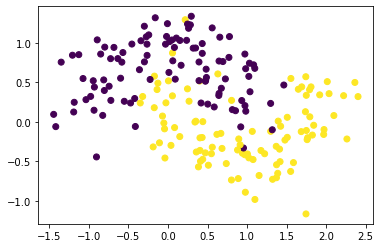

In [2]:
X, y = generate_data()
visualize(X, y)

Cost after iteration 0: 0.4692
Accuracy after iteration: 0.815
Cost after iteration 1000: 0.1527
Accuracy after iteration: 0.95
Cost after iteration 2000: 0.1494
Accuracy after iteration: 0.945
Cost after iteration 3000: 0.1478
Accuracy after iteration: 0.94
Cost after iteration 4000: 0.1458
Accuracy after iteration: 0.94
Cost after iteration 5000: 0.1444
Accuracy after iteration: 0.95
Cost after iteration 6000: 0.1433
Accuracy after iteration: 0.95
Cost after iteration 7000: 0.1423
Accuracy after iteration: 0.955
Cost after iteration 8000: 0.1415
Accuracy after iteration: 0.955
Cost after iteration 9000: 0.1407
Accuracy after iteration: 0.955
Final accuracy: 0.945

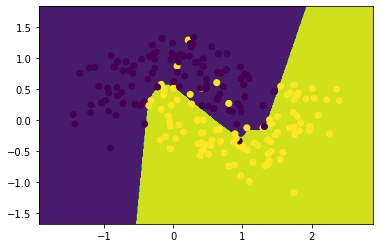

In [3]:
model = train(initialize_model(dim_hid=5), X, y, debug=True,zm=0)
visualize(X, y, model)

Final accuracy: 0.84 of model with dim_hid = 1


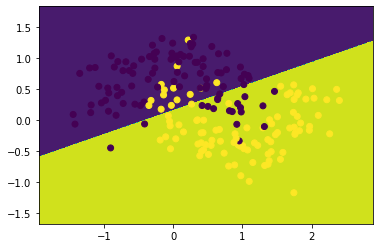

Final accuracy: 0.9 of model with dim_hid = 2


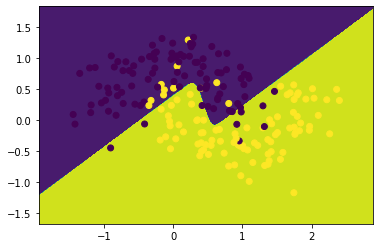

Final accuracy: 0.945 of model with dim_hid = 5


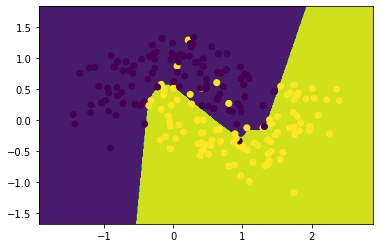

Final accuracy: 0.96 of model with dim_hid = 10


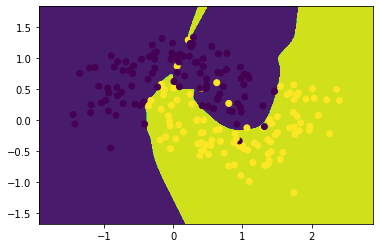

Final accuracy: 0.96 of model with dim_hid = 25


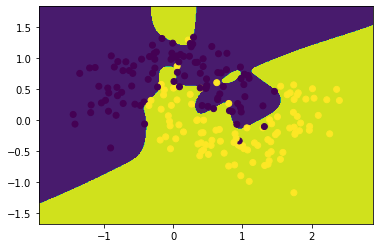

In [4]:
list=[1,2,5,10,25]
for i in range(0,len(list)):
    model = train(initialize_model(dim_hid=list[i]), X, y, debug=True,zm=1)
    print(" of model with dim_hid =",list[i])
    visualize(X, y, model)

In [32]:
from sklearn.datasets import make_blobs
X, y = datasets.make_classification(n_samples=200,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    class_sep=1.0,
    random_state=0)

Final accuracy: 0.93 of model with dim_hid = 1


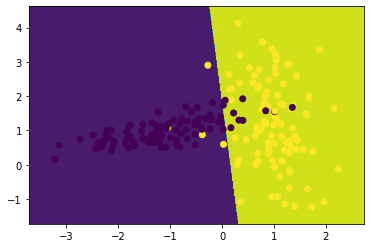

Final accuracy: 0.94 of model with dim_hid = 2


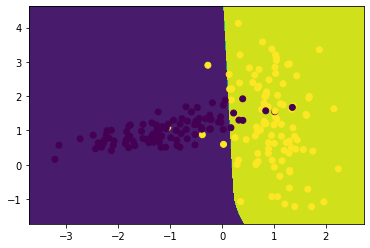

Final accuracy: 0.965 of model with dim_hid = 3


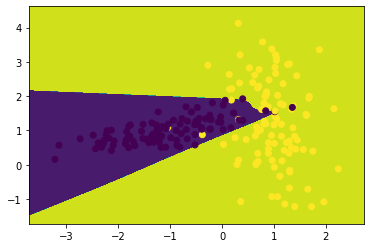

Final accuracy: 0.965 of model with dim_hid = 4


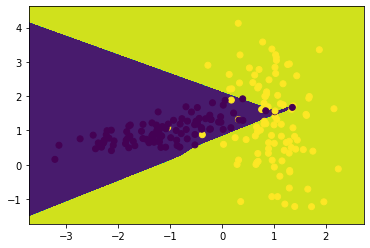

Final accuracy: 0.965 of model with dim_hid = 5


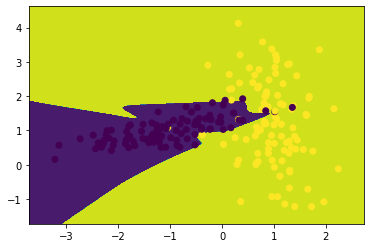

Final accuracy: 0.97 of model with dim_hid = 6


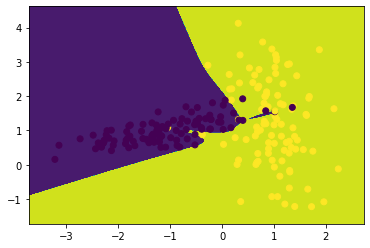

Final accuracy: 0.97 of model with dim_hid = 7


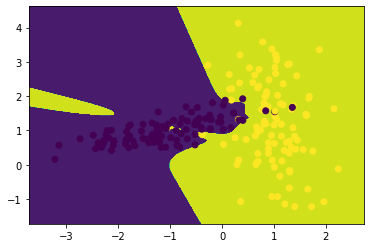

Final accuracy: 0.965 of model with dim_hid = 8


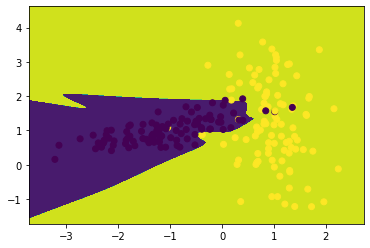

Final accuracy: 0.98 of model with dim_hid = 9


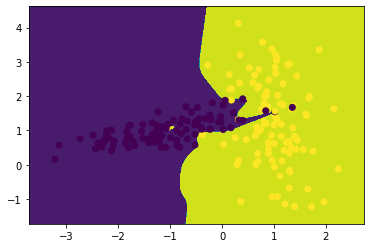

Final accuracy: 0.985 of model with dim_hid = 10


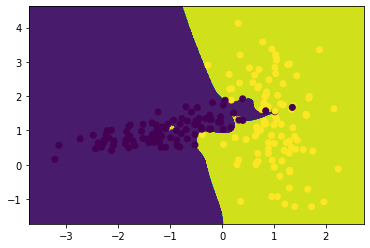

In [31]:
for i in range(1,11):
    model = train(initialize_model(dim_hid=i), X, y, debug=True,zm=1)
    print(" of model with dim_hid =",i)
    visualize(X, y, model)

Final accuracy: 0.945 of model with alpha = 0.1


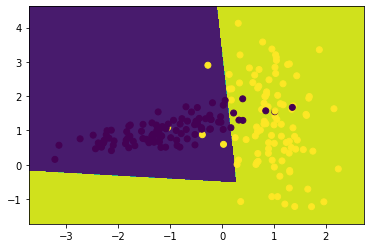

Final accuracy: 0.965 of model with alpha = 0.01


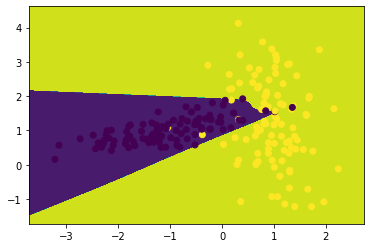

Final accuracy: 0.96 of model with alpha = 0.001


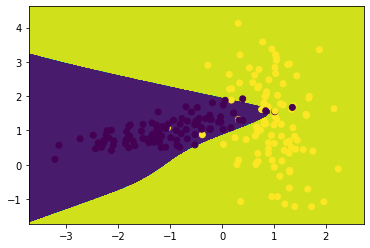

Final accuracy: 0.94 of model with alpha = 0.0001


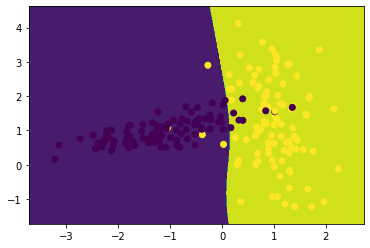

In [41]:
alpha=[0.1,0.01,0.001,0.0001]
for i in range(0,len(alpha)):
    model = train(initialize_model(dim_hid=3), X, y, alpha=alpha[i], debug=True,zm=1)
    print(" of model with alpha =",alpha[i])
    visualize(X, y, model)

Final accuracy: 0.94 of model with epochs = 100


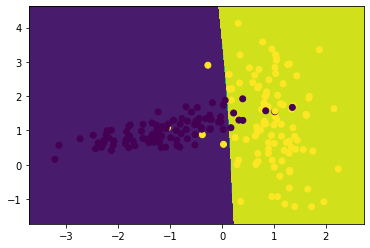

Final accuracy: 0.965 of model with epochs = 1000


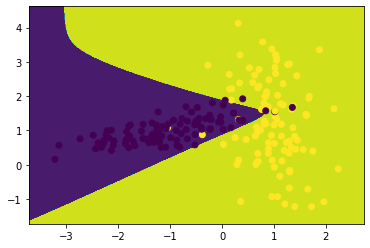

Final accuracy: 0.965 of model with epochs = 10000


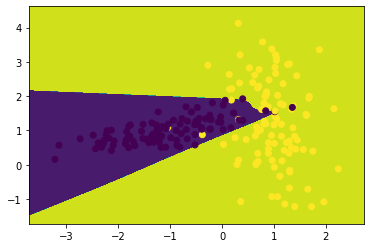

Final accuracy: 0.965 of model with epochs = 50000


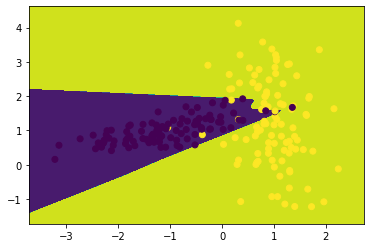

Final accuracy: 0.965 of model with epochs = 100000


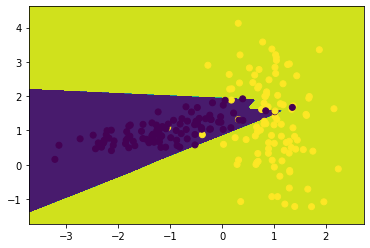

In [48]:
epochs=[100,1000,10000,50000,100000]
for i in range(0,len(epochs)):
    model = train(initialize_model(dim_hid=3), X, y, alpha=0.01, epochs=epochs[i],debug=True,zm=1)
    print(" of model with epochs =",epochs[i])
    visualize(X, y, model)

In [49]:
print("Best parameters for model:")
print("Alpha =",0.01)
print("Epochs =",10000)
print("Hidden dimensions =",3)
print("Final accuracy of the model =",0.965)

Best parameters for model:
Alpha = 0.01
Epochs = 10000
Hidden dimensions = 3
Final accuracy of the model = 0.965
